# Time-Series Bias

This note demonstrates 
* small-sample bias
* inconsistency

in time-series regressions with serial correlation.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [2]:
ALPHA = 0
BETA = .9
GAMMA = .5

T = 1000
tgrid = [50,100,500,1000]
N = 5000

np.random.seed(seed=100)
upsilon = pd.DataFrame(np.random.normal(size=(T,N)))

# Regressor w/ Serial Correlation

## Simulate the Data
### White noise errors: $\gamma = 0$

$\begin{align}
y_t =&\; \alpha + \beta y_{t-1} + \epsilon_t\\
\epsilon_t =&\; \gamma \epsilon_{t-1} + \upsilon_t
\end{align}$

In [3]:
epsilon = pd.DataFrame(index=upsilon.index, columns = upsilon.columns, dtype=float)
epsilon.loc[0,:] = upsilon.loc[0,:]

y = pd.DataFrame(index=upsilon.index, columns = upsilon.columns, dtype=float)
y.loc[0,:] = epsilon.loc[0,:]

for t in upsilon.index[1:]:
    epsilon.loc[t,:] = 0 * epsilon.loc[t-1,:] + upsilon.loc[t,:]
    y.loc[t,:] = ALPHA + BETA * y.loc[t-1,:] + epsilon.loc[t,:]

## Estimate Regression Parameters

$\begin{align}
y_t = a + b y_{t-1} + e_t
\end{align}$

In [4]:
alphas = pd.DataFrame(index=y.columns, columns=tgrid)
betas = pd.DataFrame(index=y.columns, columns=tgrid)
y_clean = y.iloc[1:,:]
ylag_clean = y.shift().dropna()

for tlim in tgrid:
    for sim in y.columns:
        Xsim = ylag_clean[[sim]].values[0:tlim]
        ysim = y_clean[[sim]].values[0:tlim]

        mod = LinearRegression(fit_intercept=True).fit(Xsim,ysim)
        alphas.loc[sim,tlim] = mod.intercept_[0]
        betas.loc[sim,tlim] = mod.coef_[0,0]

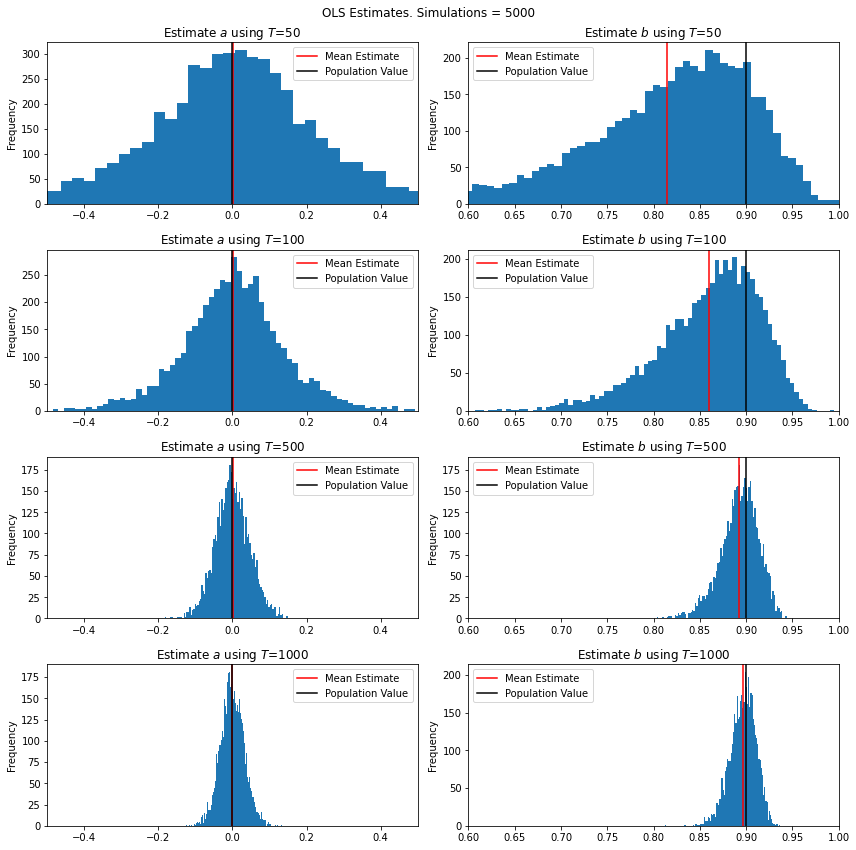

In [5]:
fig, ax = plt.subplots(len(tgrid),2,figsize=(12,12))
for i,t in enumerate(tgrid):
    alphas.iloc[:,i].plot.hist(bins=round(N/50),ax=ax[i,0],xlim=(-.5,.5),title=f'Estimate $a$ using $T$={t}')
    ax[i,0].axvline(alphas.iloc[:,i].mean(),color='r')
    ax[i,0].axvline(ALPHA,color='k')
    ax[i,0].legend(['Mean Estimate','Population Value'])
    
    betas.iloc[:,i].plot.hist(bins=round(N/50),ax=ax[i,1],xlim=(.6,1),title=f'Estimate $b$ using $T$={t}')
    ax[i,1].axvline(betas.iloc[:,i].mean(),color='r')
    ax[i,1].axvline(BETA,color='k')
    ax[i,1].legend(['Mean Estimate','Population Value'])

plt.suptitle(f'OLS Estimates. Simulations = {N}')
plt.tight_layout()
plt.show()

# Regressor AND Errors w/ Serial Correlation

## Simulate the Data
### Serially correlated errors: $\gamma=.5$
$\begin{align}
y_t =&\; \alpha + \beta y_{t-1} + \epsilon_t\\
\epsilon_t =&\; \gamma \epsilon_{t-1} + \upsilon_t
\end{align}$

In [6]:
epsilon = pd.DataFrame(index=upsilon.index, columns = upsilon.columns, dtype=float)
epsilon.loc[0,:] = upsilon.loc[0,:]

y = pd.DataFrame(index=upsilon.index, columns = upsilon.columns, dtype=float)
y.loc[0,:] = epsilon.loc[0,:]

for t in upsilon.index[1:]:
    epsilon.loc[t,:] = GAMMA * epsilon.loc[t-1,:] + upsilon.loc[t,:]
    y.loc[t,:] = ALPHA + BETA * y.loc[t-1,:] + epsilon.loc[t,:]

## Estimate Regression Parameters

$\begin{align}
y_t = a + b y_{t-1} + e_t
\end{align}$

In [7]:
alphas = pd.DataFrame(index=y.columns, columns=tgrid)
betas = pd.DataFrame(index=y.columns, columns=tgrid)
y_clean = y.iloc[1:,:]
ylag_clean = y.shift().dropna()

for tlim in tgrid:
    for sim in y.columns:
        Xsim = ylag_clean[[sim]].values[0:tlim]
        ysim = y_clean[[sim]].values[0:tlim]

        mod = LinearRegression(fit_intercept=True).fit(Xsim,ysim)
        alphas.loc[sim,tlim] = mod.intercept_[0]
        betas.loc[sim,tlim] = mod.coef_[0,0]

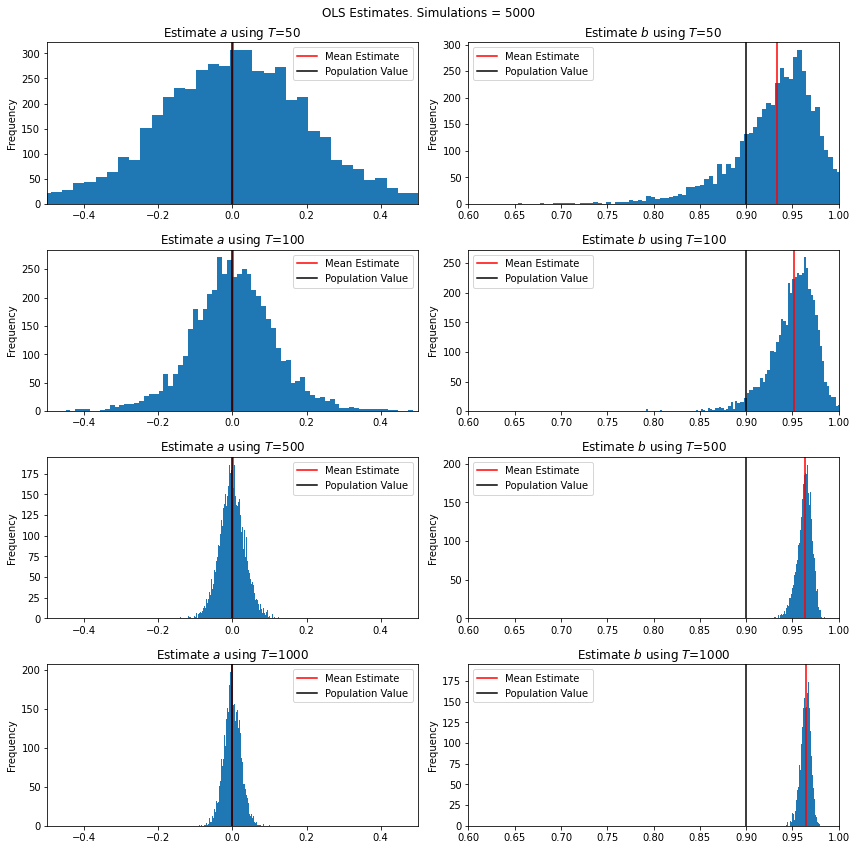

In [8]:
fig, ax = plt.subplots(len(tgrid),2,figsize=(12,12))
for i,t in enumerate(tgrid):
    alphas.iloc[:,i].plot.hist(bins=round(N/50),ax=ax[i,0],xlim=(-.5,.5),title=f'Estimate $a$ using $T$={t}')
    ax[i,0].axvline(alphas.iloc[:,i].mean(),color='r')
    ax[i,0].axvline(ALPHA,color='k')
    ax[i,0].legend(['Mean Estimate','Population Value'])
    
    betas.iloc[:,i].plot.hist(bins=round(N/50),ax=ax[i,1],xlim=(.6,1),title=f'Estimate $b$ using $T$={t}')
    ax[i,1].axvline(betas.iloc[:,i].mean(),color='r')
    ax[i,1].axvline(BETA,color='k')
    ax[i,1].legend(['Mean Estimate','Population Value'])

plt.suptitle(f'OLS Estimates. Simulations = {N}')
plt.tight_layout()
plt.show()